In [1026]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data load + preprocessing

In [1027]:
df = pd.read_csv('dataset/Steam_survey.csv')
df_pc = df[df['platform'] == 'pc']
df_pc.loc[:, 'date'] = pd.to_datetime(df_pc['date'])

df_pc.sample(5)

,index,perc,category,date,platform
221506,NVIDIA TITAN Xp,0.02,DirectX 11 Systems,2018-06-01 00:00:00,pc
244119,AMD Radeon HD 8500 Series,0.34,Vulkan Systems,2020-01-01 00:00:00,pc
264983,NVIDIA GeForce 930M,0.06,DirectX 12 Systems,2021-08-01 00:00:00,pc
61774,200 Gb to 209.9 Gb,1.45,Free Hard Drive Space,2007-11-01 00:00:00,pc
178770,Intel Q965/Q963 Express,4.35,DirectX 9 Shader Model 2.0 GPUs,2016-05-01 00:00:00,pc


In [1028]:
df_pc.dtypes

index        object
perc        float64
category     object
date         object
platform     object
dtype: object

In [1029]:
df_pc['category'].unique()

array(['Windows Version', 'System RAM', 'Processor Vendor',
       'Intel CPU Speeds', 'AMD CPU Speeds', 'Physical CPUs',
       'Vulkan Systems', 'DirectX 12 Systems', 'DirectX 12 GPUs',
       'DirectX 11 Systems', 'DirectX 11 GPUs', 'DirectX 10 Systems',
       'DirectX 10 GPUs', 'DirectX 9 Shader Model 2b and 3.0 GPUs',
       'DirectX 9 Shader Model 2.0 GPUs', 'Video Card Description',
       'VRAM', 'Primary Display Resolution',
       'Multi-Monitor Desktop Resolution', 'Language', 'Drive Type',
       'Free Hard Drive Space', 'Total Hard Drive Space',
       'Other Settings', 'Network Speed', 'CPU', 'Video Card Driver Name',
       'Game Screen Width', 'Game Screen Depth', 'Game Renderer',
       'DriveType',
       'Cards which default to DirectX 9 Shader Model 3 Path on Source',
       'Cards which default to DirectX 9 Shader Model 2 Path on Source',
       'Cards which default to DirectX 8 Path on Source',
       'Cards which default to DirectX 7 Path on Source', 'ATI Driver

Let's choose 2 categories to visualize:
- Windows versions (and how stop of support affected them)
- CPU trend

In [1030]:
df_pc_windows = df_pc[df_pc['category'] == 'Windows Version']
df_pc_windows_filtered = df_pc_windows[
    df_pc_windows['index'].apply(lambda x: True if 'windows' in x.lower() else False)]
df_pc_windows_filtered['index'].unique()

array(['Windows 10 64 bit', 'Windows 11 64 bit', 'Windows 7 64 bit',
       'Windows 8.1 64 bit', 'Windows 7', 'Windows 10', 'Windows XP',
       'Windows Vista', 'Windows 2000', 'Windows 2003 64 bit',
       'Windows Vista 64 bit', 'Windows XP 32 bit',
       'Windows Vista 32 bit', 'Windows XP 64 bit', 'Windows 8 64 bit',
       'Windows 8', 'Windows 2008 64 bit', 'Windows 2008', 'Windows 2003',
       'Windows 2012 64 bit', 'Windows 2000 64 bit', 'Windows NT',
       'Windows 8.1'], dtype=object)

also let's unite 64bit and 32bit clients

In [1031]:
df_pc_windows_filtered.loc[:, 'index'] = df_pc_windows_filtered['index'].apply(
    lambda x: x.replace(' 64 bit', '').replace(' 32 bit', ''))
df_pc_windows_filtered['index'].unique()

array(['Windows 10', 'Windows 11', 'Windows 7', 'Windows 8.1',
       'Windows XP', 'Windows Vista', 'Windows 2000', 'Windows 2003',
       'Windows 8', 'Windows 2008', 'Windows 2012', 'Windows NT'],
      dtype=object)

For CPUs we will need to select all Intel and AMD indexes

In [1032]:
df_pc_cpu = df_pc[df_pc['category'] == 'Processor Vendor']
df_pc_cpu = df_pc_cpu[
    df_pc_cpu['index'].apply(lambda x: True if 'intel' in x.lower() or 'amd' in x.lower() else False)].copy()
df_pc_cpu.loc[:, 'index'] = df_pc_cpu['index'].apply(lambda x: 'Intel' if 'intel' in x.lower() else 'AMD')
df_pc_cpu

,index,perc,category,date,platform
358,Intel,68.77,Processor Vendor,2023-10-01 00:00:00,pc
359,AMD,31.19,Processor Vendor,2023-10-01 00:00:00,pc
2768,Intel,66.52,Processor Vendor,2023-09-01 00:00:00,pc
2769,AMD,33.43,Processor Vendor,2023-09-01 00:00:00,pc
5227,Intel,66.76,Processor Vendor,2023-08-01 00:00:00,pc
...,...,...,...,...,...
267499,AMD,27.31,Processor Vendor,2021-10-01 00:00:00,pc
269034,Intel,68.45,Processor Vendor,2021-11-01 00:00:00,pc
269035,AMD,31.53,Processor Vendor,2021-11-01 00:00:00,pc
270598,Intel,68.45,Processor Vendor,2021-12-01 00:00:00,pc


Done!

# Data visualization

### Windows versions

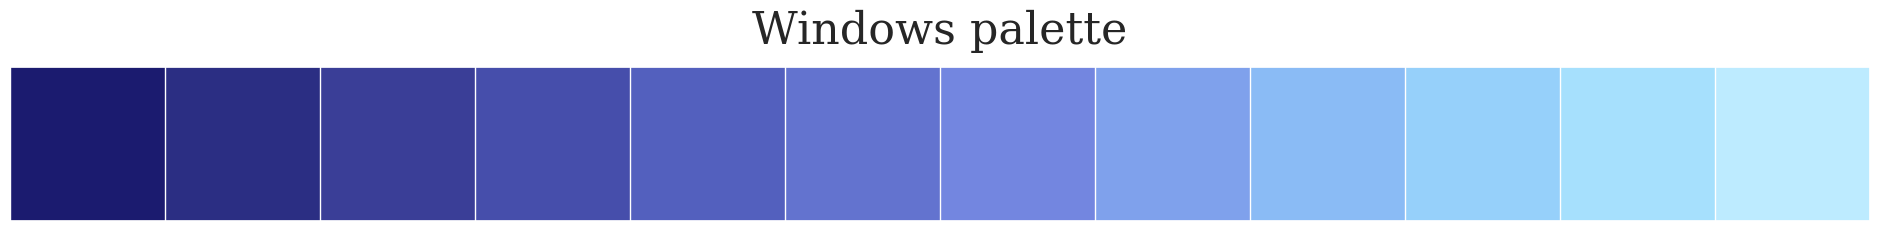

In [1033]:
c_map = [
    "#1B1B6F", "#2B2E83", "#3A3E97", "#464EAB",
    "#5360BE", "#6373CF", "#7386E0", "#7FA1EC",
    "#8ABBF5", "#96D0FA", "#A6E0FD", "#BDEBFF",
]
sns.palplot(c_map, size=2)
sns.set_theme()
plt.title("Windows palette", loc='center', fontfamily='serif', fontsize=32, y=1.1)
plt.show()

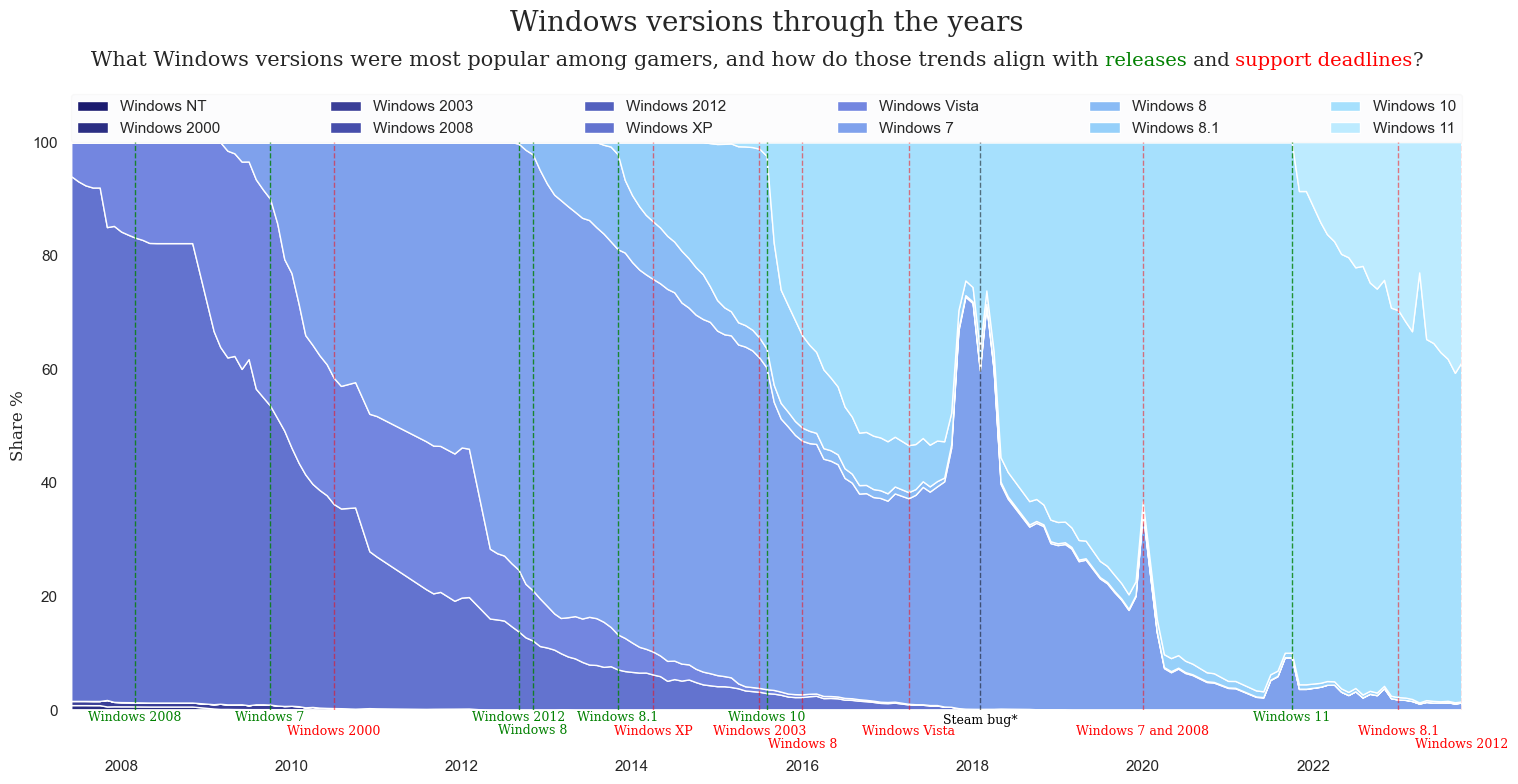

In [1034]:
piv = (df_pc_windows_filtered.pivot_table(index="date", columns="index", values="perc", aggfunc="sum")
       .fillna(0)
       .sort_index())

row_sums = piv.sum(axis=1)
piv.loc[row_sums > 0] = piv.loc[row_sums > 0].div(row_sums[row_sums > 0], axis=0) * 100

custom = [
    "Windows 11", "Windows 10", "Windows 8.1", "Windows 8",
    "Windows 7", "Windows Vista", "Windows XP",
    "Windows 2012", "Windows 2008", "Windows 2003", "Windows 2000",
    "Windows NT"
][::-1]

ordered_cols = [c for c in custom if c in piv.columns] + [c for c in piv.columns if c not in custom]

piv = piv[ordered_cols]

fig, ax = plt.subplots(figsize=(16, 8))
ax.stackplot(piv.index, piv.T.values, labels=piv.columns, colors=c_map)
ax.set_title("Windows versions through the years", fontfamily='serif', pad=80, size=20)

ax.set_ylabel("Share %", fontfamily='serif', )
ax.legend(bbox_to_anchor=(0., 1., 1., 0), loc='lower left',
          ncols=6, mode="expand", borderaxespad=0., framealpha=.1)
ax.set_xlim(piv.index.min(), piv.index.max())
ax.margins(x=0, y=0)
ax.tick_params(axis='x', pad=30)
release_dates = {
    "Windows 2000": "2000-02",
    "Windows XP": "2001-10",
    "Windows 2003": "2003-04",
    "Windows Vista": "2007-02",
    "Windows 7": "2009-10",
    "Windows 8": "2012-11",
    "Windows 8.1": "2013-11",
    "Windows 10": "2015-08",
    "Windows 11": "2021-10",
    "Windows 2008": "2008-03",
    "Windows 2012": "2012-09",
}

support_stop = {
    "Windows 2000": "2010-07",
    "Windows XP": "2014-04",
    "Windows 2003": "2015-07",
    "Windows Vista": "2017-04",
    "Windows 7 and 2008": "2020-01",
    "Windows 8": "2016-01",
    "Windows 8.1": "2023-01",
    "Windows 2012": "2023-10"
}

bugs = {
    'Steam bug*': '2018-02'
}

rels = pd.to_datetime(pd.Series(release_dates)).sort_values()
stops = pd.to_datetime(pd.Series(support_stop)).sort_values()
bgs = pd.to_datetime(pd.Series(bugs)).sort_values()
x0, x1 = piv.index.min(), piv.index.max()
rels = rels[(rels >= x0) & (rels <= x1)]

for i, (name, x) in enumerate(rels.items()):
    ax.axvline(x, linestyle="--", linewidth=1, color="0.6", alpha=0.8, zorder=5, c='green')
    ax.text(
        x, -.025 + (-1 * (i == 3)) * 0.022, name, rotation=0, ha="center", va="bottom",
        transform=ax.get_xaxis_transform(), fontsize=9, fontfamily='serif', color="green"
    )

for i, (name, x) in enumerate(stops.items()):
    ax.axvline(x, linestyle="--", linewidth=1, color="0.6", alpha=0.5, zorder=5, c='red')
    ax.text(
        x, -.05 + (-1 * (i == 3 or i == 7)) * 0.022, name, rotation=0, ha="center", va="bottom",
        transform=ax.get_xaxis_transform(), fontsize=9, fontfamily='serif', color='red'
    )

for i, (name, x) in enumerate(bgs.items()):
    ax.axvline(x, linestyle="--", linewidth=1, color="0.6", alpha=0.5, zorder=5, c='black')
    ax.text(
        x, -.03, name, rotation=0, ha="center", va="bottom",
        transform=ax.get_xaxis_transform(), fontsize=9, fontfamily='serif', color='black'
    )

text = plt.text(piv.index.min(), 116,
                '   What Windows versions were most popular among gamers, and how do those trends align with',
                ha='left', va='top', fontsize=15, fontfamily='serif', )
text = ax.annotate(" releases", xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize=14, fontfamily='serif',
                   color='green')
text = ax.annotate(" and", xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize=14, fontfamily='serif')
text = ax.annotate(" support deadlines", xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize=14,
                   fontfamily='serif', color='red')
text = ax.annotate("?", xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize=14, fontfamily='serif')

plt.tight_layout()
plt.show()

### Gamer's CPU choice

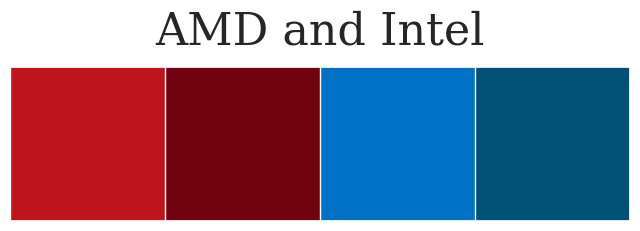

In [1035]:
c_map = ["#BE151C", "#720410", "#0071C5", "#005175"]
sns.palplot(c_map, size=2)
sns.set_theme()
plt.title("AMD and Intel", loc='center', fontfamily='serif', fontsize=32, y=1.1)
plt.show()

In [1036]:
agg_df

,index,date,perc
0,AMD,2004-04-01,47.44
1,AMD,2004-06-01,46.13
2,AMD,2004-07-01,46.13
3,AMD,2004-08-01,46.13
4,AMD,2004-09-01,46.13
...,...,...,...
397,Intel,2023-06-01,67.52
398,Intel,2023-07-01,67.94
399,Intel,2023-08-01,66.76
400,Intel,2023-09-01,66.52


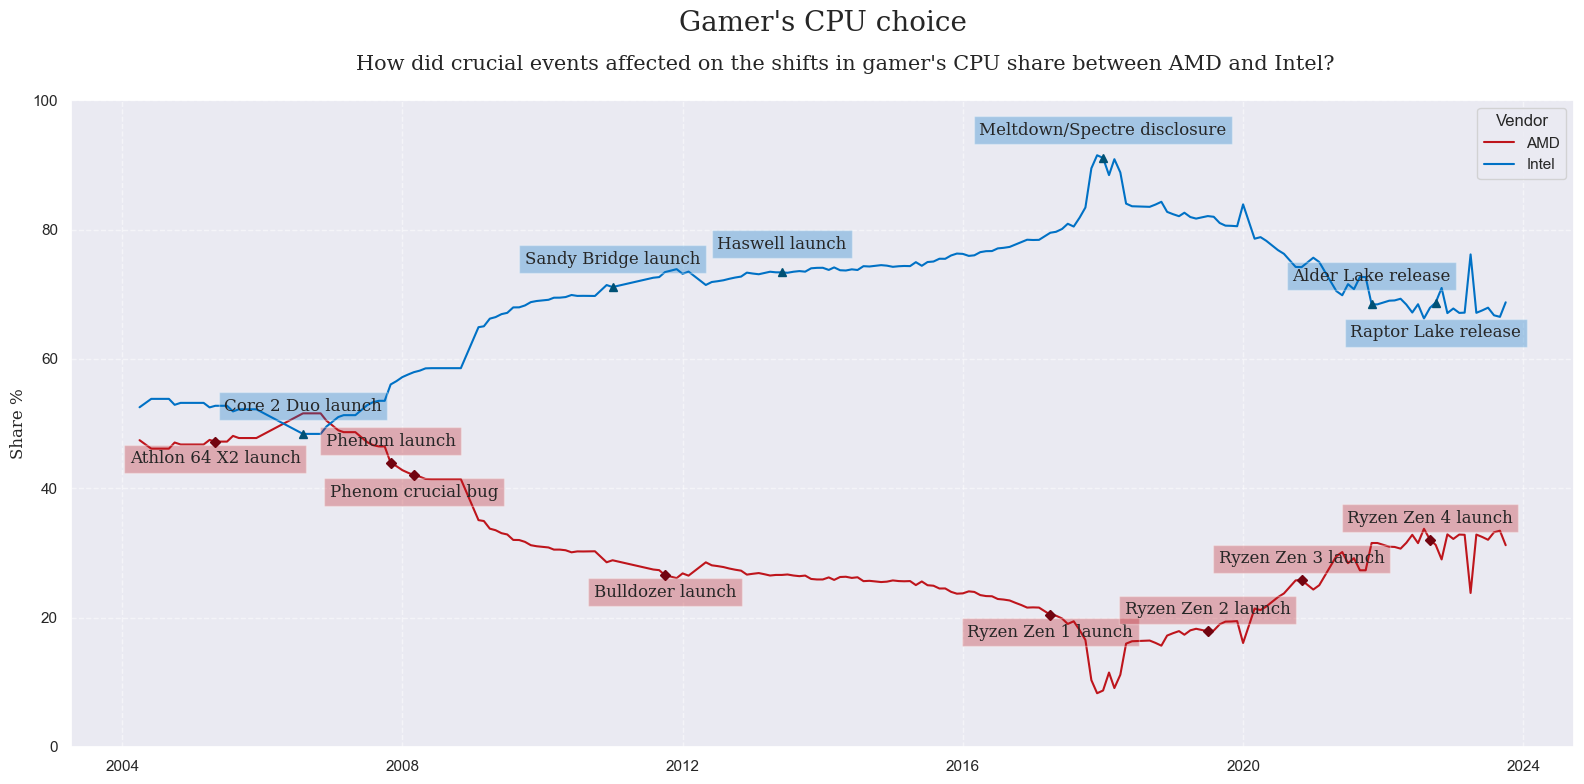

In [1037]:
agg_df = df_pc_cpu.groupby(['index', 'date'], as_index=False)['perc'].max()

fig, ax = plt.subplots(figsize=(16, 8))
for i, (vendor, group) in enumerate(agg_df.groupby('index')):
    group_sorted = group.sort_values('date')
    plt.plot(group_sorted['date'], group_sorted['perc'], label=vendor, color=c_map[i * 2])

amd_events = {
    "Athlon 64 X2 launch": "2005-05",
    "Phenom launch": "2007-11",
    "Phenom crucial bug": "2008-03",
    "Bulldozer launch": "2011-10",
    "Ryzen Zen 1 launch": "2017-04",
    "Ryzen Zen 2 launch": "2019-07",
    "Ryzen Zen 3 launch": "2020-11",
    "Ryzen Zen 4 launch": "2022-09"
}

intel_events = {
    "Core 2 Duo launch": "2006-08",
    "Sandy Bridge launch": "2011-01",
    "Haswell launch": "2013-06",
    "Meltdown/Spectre disclosure": "2018-01",
    "Alder Lake release": "2021-11",
    "Raptor Lake release": "2022-10"
}

amd = pd.to_datetime(pd.Series(amd_events)).sort_values()
intel = pd.to_datetime(pd.Series(intel_events)).sort_values()

for i, (name, x) in enumerate(amd.items()):
    y = agg_df[(agg_df['index'] == 'AMD') & (agg_df['date'] == x)]
    ax.plot(x, y.iloc[0, 2], color=c_map[1], marker='D', markersize=5, zorder=5)
    ax.text(x, y.iloc[0, 2] - 4 + 6 * (i == 1 or i > 4), name, rotation=0, ha="center", va="bottom",
            bbox=dict(facecolor=c_map[0], alpha=0.3), fontfamily='serif')

for i, (name, x) in enumerate(intel.items()):
    y = agg_df[(agg_df['index'] == 'Intel') & (agg_df['date'] == x)]
    ax.plot(x, y.iloc[0, 2], color=c_map[3], marker='^', markersize=6, zorder=5)
    ax.text(x, y.iloc[0, 2] + 3 - 9 * (i == 5), name, rotation=0, ha="center", va="bottom",
            bbox=dict(facecolor=c_map[2], alpha=0.3), fontfamily='serif')

ax.set_ylabel('Share %', fontfamily='serif')
ax.set_title('Gamer\'s CPU choice', fontfamily='serif', pad=50, size=20)

ax.legend(title='Vendor')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_ylim(0, 100)
plt.text(agg_df['date'].mean(), 107,
         'How did crucial events affected on the shifts in gamer\'s CPU share between AMD and Intel?',
         ha='center', va='top', fontsize=15, fontfamily='serif', )
fig.tight_layout()
plt.show()